# Proyecto Showz

## Introduccion 
Para el desarrollo de este proyecto, buscamos optimizar los gastos de marketing basando la investigación en el análisis de datos de comportamiento de los usuarios. A su vez, se establecerán cohortes de clientes con el objetivo de entender cómo, cuándo y cuánto aportan a la compañía. Este enfoque nos permitirá identificar patrones de uso, momentos clave en el ciclo de vida del cliente y calcular el retorno de la inversión en adquisición, facilitando así una mejor toma de decisiones estratégicas.

Contamos con los registros del servidor con los siguientes datasets:
- visits.csv: visitas al sitio (ID, fuente, timestamp, etc.).

- orders.csv: pedidos (cliente, fecha, importe, etc.).

- costs.csv: gastos de marketing (fecha, canal, inversión).

# Objetivo General 
``Optimizar los gastos de marketing entendiendo cómo, cuándo y cuánto aportan los clientes.``

## Descripcion de los datos
La tabla `visits` (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario.
- Device: dispositivo del usuario.
- Start Ts: fecha y hora de inicio de la sesión.
- End Ts: fecha y hora de término de la sesión.
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla `orders` (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido.
- Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.

La tabla `costs` (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios.
- dt: fecha.
- costs: gastos en esta fuente de anuncios en este día.

In [1000]:
# Cargar todas las librerias
import pandas as pd 


In [1001]:
# Designar las variables de los Dataframe 
visits= pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 9/visits_log_us.csv', sep=',') 
orders=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 9/orders_log_us.csv', sep=',')
costs=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 9/costs_us.csv', sep=',')

## Nombres asignados a los DataFrames

Para garantizar un desarrollo estructurado y eficiente del proyecto, se asignaron nombres descriptivos a los *DataFrames* generados a partir de las consultas a los servidores. Esta práctica permite mantener un flujo de trabajo organizado y facilita la interpretación de los resultados en las distintas etapas del análisis. Las asignaciones realizadas son las siguientes:

- `visits`: corresponde al resultado de la consulta `visits_log_us`.
- `orders`: corresponde al resultado de la consulta `orders_log_us`.
- `costs`: corresponde al resultado de la consulta `costs_us`.

A continuación, el análisis exploratorio de los datos.


In [1002]:
# Visualizacion preliminar de los dataframes:

visits.info()

# estandarizar datos:
for col in visits.select_dtypes(include='object'):
    visits[col] = visits[col].str.lower()

print('\n', visits.sample(n=5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

          Device               End Ts  Source Id             Start Ts  \
282776    touch  2017-10-21 15:55:00          3  2017-10-21 15:55:00   
263125  desktop  2018-01-11 12:50:00          4  2018-01-11 12:40:00   
301176  desktop  2018-02-06 10:06:00          2  2018-02-06 09:09:00   
25275     touch  2018-01-19 11:36:00          3  2018-01-19 11:12:00   
246172    touch  2017-11-12 22:25:00          4  2017-11-12 22:23:00   

                         Uid  
282776   7445811389565018265  
263125  13081433066871836092  
301176  111715617110

In [1003]:
# Visualizacion preliminar de los dataframes:

orders.info()

print('\n', orders.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

                     Buy Ts  Revenue                   Uid
38020  2018-03-03 19:10:00     3.05   2771391329377240183
16154  2017-11-04 21:08:00     0.37   3386416631889756314
2325   2017-06-30 19:15:00     4.58  14158485430215009858
14415  2017-10-24 21:27:00     2.75   2782735980490076186
25757  2017-12-24 15:38:00     7.33   6267430500450160427


In [1004]:
# Visualizacion preliminar de los dataframes:

costs.info()

print('\n', costs.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

       source_id          dt   costs
68            1  2017-08-08   33.71
2183         10  2017-06-05   26.68
232           1  2018-01-19   89.01
1302          4  2017-12-31   60.65
872           3  2017-10-25  369.48


## Correcion de tipo de datos

Dado que la naturaleza de los datos requiere un procesamiento adecuado, es fundamental contar con una estructura organizada y coherente. Por esta razón, se ha llevado a cabo una reorganización estratégica de los conjuntos de datos, lo cual permitirá facilitar su análisis en cada etapa del proyecto. A continuación, se detallan las transformaciones realizadas específicamente en los dataframes visits, orders y costs:

- En ``visits``, se renombran las columnas para eliminar espacios y facilitar el manejo del código (Start Ts a start_ts, End Ts a end_ts, etc.), y se convierten las columnas de fechas al formato datetime.

- En ``orders``, se transforma la columna Buy Ts a buy_ts y se asegura que los ingresos (revenue) estén en el tipo numérico correcto.

- En ``costs``, se homogeneizan los nombres (dt para la fecha, costs para los gastos) y se convierte la columna de fechas a datetime.

Esta preparación garantiza que los datos estén listos para los análisis de comportamiento, cohortes y rentabilidad que se desarrollarán a lo largo del proyecto.

In [1005]:
# Renombrar columnas para que sean más fáciles de manejar

visits.columns = ['device','end_ts', 'source_id','start_ts','uid']
orders.columns = ['buy_ts', 'revenue','uid']
costs.columns = ['source_id', 'dt', 'costs']

## Convertir fechas a datetime

visits['start_ts']=pd.to_datetime(visits['start_ts'])
visits['end_ts']=pd.to_datetime(visits['end_ts'])

orders['buy_ts']=pd.to_datetime(orders['buy_ts'])

costs['dt']=pd.to_datetime(costs['dt'])

# Revisar los tipos
print(visits.dtypes)
print(orders.dtypes)
print(costs.dtypes)



device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object
buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object
source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


# Visitas

## ¿Cuántas personas lo usan cada día, semana y mes?

- Se tiene que implementar una clasificación de las fechas para establecer la cantidad de personas y calcular un promedio mensual, semanal y diario con fines de análisis.

In [1006]:
# Crear columnas de dia, semana y mes

visits['date']=visits['start_ts'].dt.date
visits['week']=visits['start_ts'].dt.isocalendar().week 
visits['month']=visits['start_ts'].dt.month
visits['year']=visits['start_ts'].dt.isocalendar().year
print(visits.sample(n=5))

         device              end_ts  source_id            start_ts  \
329644  desktop 2018-04-28 23:15:00          4 2018-04-28 22:52:00   
281621  desktop 2018-01-08 23:59:00          4 2018-01-08 23:48:00   
339474  desktop 2018-04-17 10:53:00          3 2018-04-17 10:16:00   
67564   desktop 2018-03-05 20:46:00          9 2018-03-05 20:39:00   
274132  desktop 2017-12-02 20:10:00          4 2017-12-02 20:02:00   

                         uid        date  week  month  year  
329644  16032015834456013554  2018-04-28    17      4  2018  
281621   8356984431877168711  2018-01-08     2      1  2018  
339474   3996040301981372150  2018-04-17    16      4  2018  
67564    1550279980151174578  2018-03-05    10      3  2018  
274132    312996254484699129  2017-12-02    48     12  2017  


In [1007]:
# Usuarios únicos por día
daily_users = visits.groupby('date')['uid'].nunique().mean()

print(f"En promedio {round(daily_users)} usuarios visitaron la plataforma a nivel diario.")

# Usuarios únicos por semana
wau_total =visits.groupby(['year', 'week'])['uid'].nunique().mean()



print(f"En promedio {round(wau_total)} usuarios visitaron la plataforma a nivel semanal.")

# Usuarios únicos por mes
mau_total = visits.groupby(['year','month'])['uid'].nunique().mean()


print(f"En promedio {round(mau_total)} usuarios visitaron la plataforma a nivel anual.")

En promedio 908 usuarios visitaron la plataforma a nivel diario.
En promedio 5716 usuarios visitaron la plataforma a nivel semanal.
En promedio 23228 usuarios visitaron la plataforma a nivel anual.


- En el análisis del comportamiento de los usuarios, se observa que la plataforma recibió, en promedio, ``908 usuarios únicos`` por día. A nivel semanal, esta cifra se incrementa a ``5,716 usuarios únicos``, lo que indica una recurrencia moderada en el uso del servicio. Finalmente, al analizar el tráfico anual, se identificó un promedio de ``23,228 usuarios únicos``, lo que permite dimensionar el alcance general de la plataforma a lo largo del año.

## ¿Cuántas sesiones hay por día?

In [1008]:
# Cantidad de sesiones por día
daily_sessions = visits.groupby('date')['uid'].count().mean()

print(f"En promedio hubo {round(daily_sessions)} sesiones por dia.")


En promedio hubo 987 sesiones por dia.


- En promedio, se registraron aproximadamente ``987 sesiones diarias en la plataforma``, lo que refleja una actividad constante de los usuarios a lo largo del periodo analizado.

## ¿Cuál es la duración de cada sesión?

         device              end_ts  source_id            start_ts  \
120119  desktop 2017-11-15 13:03:00          3 2017-11-15 12:53:00   
113397  desktop 2017-12-09 00:24:00          4 2017-12-09 00:20:00   
78373   desktop 2018-01-12 17:28:00          1 2018-01-12 16:57:00   
79407   desktop 2017-10-08 13:01:00          5 2017-10-08 12:59:00   
54685     touch 2018-01-27 22:26:00          1 2018-01-27 22:25:00   
342981  desktop 2017-10-04 17:45:00          5 2017-10-04 17:45:00   
204610  desktop 2018-01-05 17:14:00          2 2018-01-05 17:12:00   
278117  desktop 2017-09-18 12:15:00          3 2017-09-18 12:15:00   
90466   desktop 2017-06-22 18:51:00          2 2017-06-22 18:49:00   
86207   desktop 2017-09-28 15:08:00          3 2017-09-28 15:07:00   

                         uid        date  week  month  year  session_duration  
120119  10243629144956210270  2017-11-15    46     11  2017              10.0  
113397  15452481774136227755  2017-12-09    49     12  2017          

<Axes: >

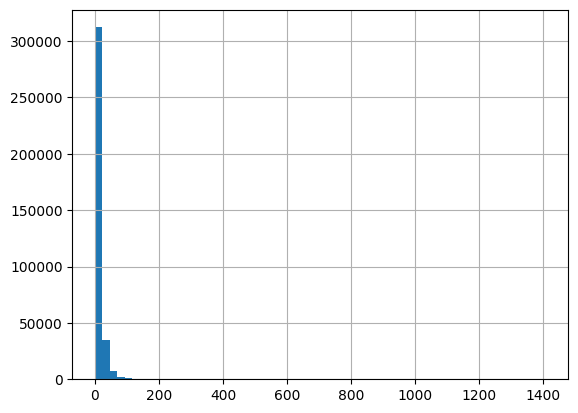

In [1009]:
# Duracion promedio de cada sesión en minutos 

visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds/60
print(visits.sample(n=10))
visits['session_duration'].hist(bins=60)




- Teniendo en cuenta que la distribucion no representan un comportamiento normal se hace necesario recurrir a la 'moda' de los datos para saber con certeza la duracion de cada usuario real.

In [1010]:
# Media y moda de los datos
 
avg_per_day = visits['session_duration'].mean()
asl_per_day = visits['session_duration'].mode()

print(f"\nLa duracion promedio de cada sesion es de {round(avg_per_day)} minutos")
print(f"\nLa duracion en minutos de cada sesion teniendo en cuenta la moda de los datos oscila entre:\n {round(asl_per_day)}")


La duracion promedio de cada sesion es de 11 minutos

La duracion en minutos de cada sesion teniendo en cuenta la moda de los datos oscila entre:
 0    1.0
Name: session_duration, dtype: float64


- La duración promedio de cada sesión en la plataforma es de aproximadamente 11 minutos, lo que sugiere que los usuarios dedican un tiempo moderado a navegar o interactuar con el sitio durante cada visita.

Por otro lado, al observar la moda de la duración de las sesiones —es decir, la duración más frecuente entre todas las registradas— se encuentra que la mayoría de las sesiones tienden a durar alrededor de 1 minuto. Esto indica que, aunque en promedio los usuarios permanecen 11 minutos, una gran proporción de sesiones son muy breves, lo que podría deberse a visitas rápidas o usuarios que abandonan el sitio sin interactuar mucho.

Este contraste entre la media y la moda resalta la importancia de considerar la distribución completa de las duraciones y no solo los valores promedio al evaluar el compromiso de los usuarios.

## ¿Con qué frecuencia los usuarios regresan?